# Semi-Automated Exploratory Data Analysis (EDA) in Python

In [ ]:
Exploratory Data Analysis, also known as EDA, has become an increasingly hot topic in data science. Just as the name suggests, it is the process of trial and error in an uncertain space, with the goal of finding insights. It usually happens at the early stage of the data science lifecycle. Although there is no clear-cut between the definition of data exploration, data cleaning, or feature engineering. EDA is generally found to be sitting right after the data cleaning phase and before feature engineering or model building. EDA assists in setting the overall direction of model selection and it helps to check whether the data has met the model assumptions. As a result, carrying out this preliminary analysis may save you a large amount of time for the following steps.

In [ ]:
I have created a semi-automated EDA process that can be broken down into the following steps:

In [ ]:
1. Know Your Data
2. Data Manipulation and Feature Engineering
3. Univariate Analysis
4. Multivariate Analysis

In [42]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 


from pandas.api.types import is_string_dtype, is_numeric_dtype

In [6]:
import pandas as pd
df = pd.read_csv('reddit_wsb.csv')
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


# info()


It gives the count of non-null values for each column and its data type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53187 entries, 0 to 53186
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      53187 non-null  object 
 1   score      53187 non-null  int64  
 2   id         53187 non-null  object 
 3   url        53187 non-null  object 
 4   comms_num  53187 non-null  int64  
 5   created    53187 non-null  float64
 6   body       24738 non-null  object 
 7   timestamp  53187 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


# describe( )

This function provides basic statistics of each column. By passing the parameter “include = ‘all’”, it outputs the value count, unique count, the top-frequency value of the categorical variables and count, mean, standard deviation, min, max, and percentile of numeric variables

In [8]:
df.describe(include='all')

,title,score,id,url,comms_num,created,body,timestamp
count,53187,53187.000000,53187,53187,53187.000000,5.318700e+04,24738,53187
unique,52049,NaN,53187,53172,NaN,NaN,24147,43460
top,AMC,NaN,l6ulcx,https://magic.freetrade.io/join/jamie/13edb513,NaN,NaN,Your daily trading discussion thread. Please k...,2021-01-29 01:03:59
freq,40,NaN,1,11,NaN,NaN,74,14
mean,NaN,1382.461053,NaN,NaN,263.260252,1.614582e+09,NaN,NaN
std,NaN,7999.271074,NaN,NaN,2532.665113,4.173566e+06,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,1.601340e+09,NaN,NaN
25%,NaN,2.000000,NaN,NaN,3.000000,1.611882e+09,NaN,NaN
50%,NaN,37.000000,NaN,NaN,17.000000,1.612488e+09,NaN,NaN
75%,NaN,207.000000,NaN,NaN,60.000000,1.615347e+09,NaN,NaN


If we leave it empty, it only shows numeric variables. As you can see, only columns being identified as “int64” in the info() output are shown below.

In [9]:
df.describe()

,score,comms_num,created
count,53187.000000,53187.000000,5.318700e+04
mean,1382.461053,263.260252,1.614582e+09
std,7999.271074,2532.665113,4.173566e+06
min,0.000000,0.000000,1.601340e+09
25%,2.000000,3.000000,1.611882e+09
50%,37.000000,17.000000,1.612488e+09
75%,207.000000,60.000000,1.615347e+09
max,348241.000000,93268.000000,1.629095e+09


# Missing Value

Handling missing values is a rabbit hole that cannot be covered in one or two sentences. If you would love to know how to address missing values in the model lifecycle and understand different types of missing data, here are some articles that may help:

we will focus on identifying the number of missing values. isnull().sum()returns the number of missing values for each column.

In [11]:
df.isnull().sum()

title            0
score            0
id               0
url              0
comms_num        0
created          0
body         28449
timestamp        0
dtype: int64

We can also do some simple manipulations to make the output more insightful. Firstly, calculate the percentage of missing values.

In [12]:
missing_count=df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count *100,2)
missing_df = pd.DataFrame({'count':missing_count, 'percentage':missing_percentage})
print(missing_df)

           count  percentage
title          0        0.00
score          0        0.00
id             0        0.00
url            0        0.00
comms_num      0        0.00
created        0        0.00
body       28449       53.49
timestamp      0        0.00


Then, visualize the percentage of the missing value based on the data frame “missing_df”. The for loop is basically a handy way to add labels to the bars. As we can see from the chart, nearly half of the “body” values from the “reddit_wsb” dataset are missing, which leads us to the next step “feature engineering”.

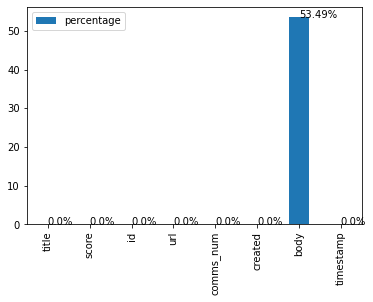

In [13]:
barchart = missing_df.plot.bar(y='percentage')

for index, percentage in enumerate(missing_percentage):
    barchart.text(index,percentage,str(percentage) + '%')

# Feature Engineering

feature engineering as a fancy way of saying transforming the data at hand to make it more insightful. There are several common techniques, e.g. change the date of birth into age, decomposing date into year, month, day, and binning numeric values. But the general rule is that this process should be tailored to both the data at hand and the objectives to achieve. If you would like to know more about these techniques, I found this article “Fundamental Techniques of Feature Engineering for Machine Learning” brings a holistic view of feature engineering in practice. 

For the “reddit_wsb” dataset, I simply did three manipulations on the existing data.

# 1. title → title_length;

In [14]:
df['title_length'] = df['title'].apply(len)

As a result, the high-cardinality column “title” has been transformed into a numeric variable which can be further used in the correlation analysis.

# 2. body → with_body

In [16]:
import numpy as np
df['with_body'] = np.where(df['body'].isnull(), 'Yes', 'No')

Since there is a large portion of missing values, the “body” field is transformed into either with_body = “Yes” and with_body = “No”, thus it can be easily analyzed as a categorical variable.

# 3. timestamp→ month

In [17]:
df['month'] = pd.to_datetime(df['timestamp']).dt.month.apply(str)

Since most data are gather from the year “2021”, there is no point comparing the year. Therefore I kept the month section of the “date”, which also helps to group data into larger subsets.

In order to streamline the further analysis, I drop the columns that won’t contribute to the EDA.

In [18]:
df = df.drop(['id', 'url', 'timestamp', 'title', 'body'], axis=1)

For the “restaurant” dataset, the data is already clean enough, therefore I simply trimmed out the columns with high cardinality.

In [20]:
#df = df.drop(['Restaurant', 'City'], axis=1)

# techniques to perform EDA: 

1. Know Your Data: have a bird's view of the characteristics of the dataset. 

2. Feature Engineering: transform variables into something more insightful.

3. Univariate Analysis: 1) histogram to visualize numerical data; 2) bar chart to visualize categorical data.

4. Multivariate Analysis: 1) Numerical vs. Numerical: correlation matrix, scatterplot (pairplot); 2) Categorical vs. Categorical: Grouped bar chart; 3) Numerical vs. Categorical: pairplot with hue, box plot. 

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype


In [24]:
df = pd.read_csv('Independence100.csv')
df.head(5)

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0


# 1. Know Your Data ###

In [25]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           100 non-null    int64  
 1   Restaurant     100 non-null    object 
 2   Sales          100 non-null    float64
 3   Average Check  100 non-null    int64  
 4   City           100 non-null    object 
 5   State          100 non-null    object 
 6   Meals Served   100 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


,Rank,Sales,Average Check,Meals Served
count,100.000000,1.000000e+02,100.000000,100.000000
mean,50.500000,1.783343e+07,69.050000,317166.660000
std,29.011492,5.010408e+06,34.735181,192211.390011
min,1.000000,1.139168e+07,17.000000,87070.000000
25%,25.750000,1.409484e+07,39.000000,189492.500000
50%,50.500000,1.730078e+07,65.500000,257097.000000
75%,75.250000,1.990392e+07,95.000000,372079.000000
max,100.000000,3.908034e+07,194.000000,959026.000000


In [26]:
# missing values #
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100,2) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

               count  percentage
Rank               0         0.0
Restaurant         0         0.0
Sales              0         0.0
Average Check      0         0.0
City               0         0.0
State              0         0.0
Meals Served       0         0.0


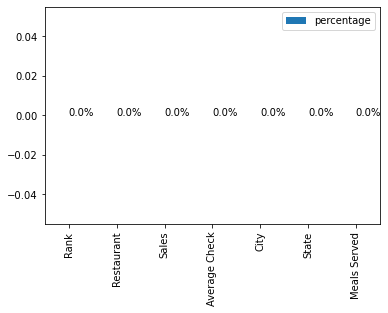

In [27]:
# visualize missing value#
barchart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate(missing_percentage):
    barchart.text(index, percentage, str(percentage) + '%' )


# 2. Feature Engineering ###


In [ ]:
# adding title_length
df['title_length'] = df['title'].apply(len)

# extracting month from date
df['month'] = pd.to_datetime(df['date']).dt.month.apply(str)

# whether the article has subtitle
df['with_subtitle'] = np.where(df['subtitle'].isnull(), 'Yes', 'No')

# drop unnecessary columns
df = df.drop(['id', 'subtitle', 'title', 'url', 'date', 'image', 'responses'], axis=1)

In [30]:
# populate the list of numeric attributes and categorical attributes
num_list = []
cat_list = []

In [31]:
for column in df:
 if is_numeric_dtype(df[column]):
        num_list.append(column)
 elif is_string_dtype(df[column]):
        cat_list.append(column)    

print(num_list)
print(cat_list)

['Rank', 'Sales', 'Average Check', 'Meals Served']
['Restaurant', 'City', 'State']


# 3. Univaraite Analysis ###


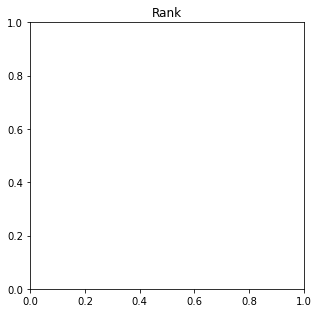

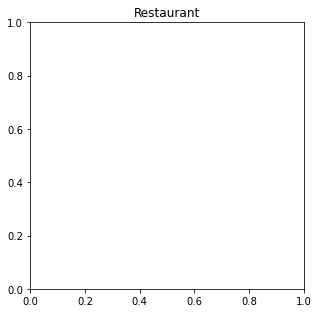

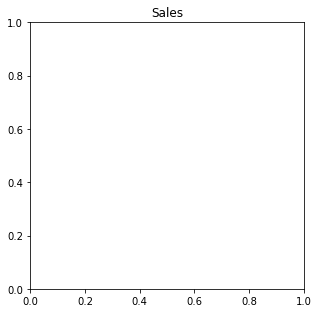

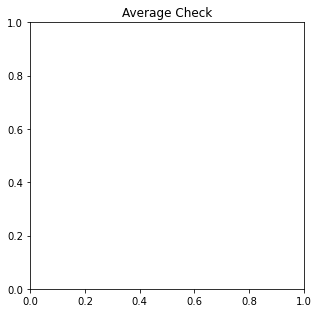

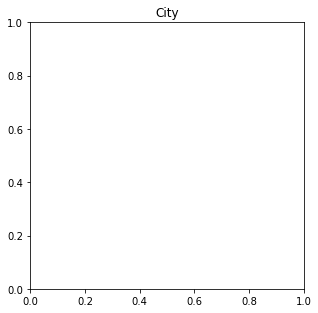

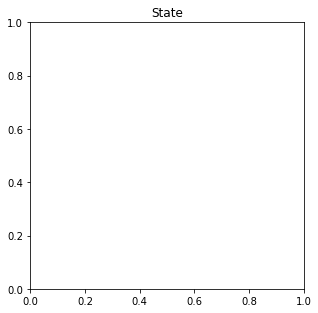

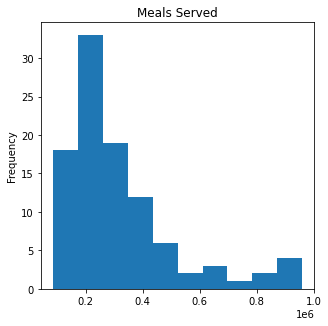

In [34]:
# bar chart and histogram
for column in df:
    plt.figure(column, figsize = (4.9,4.9))
    plt.title(column)
if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
elif is_string_dtype(df[column]):
 # show only the TOP 10 value count in each categorical data
        df[column].value_counts()[:10].plot(kind = 'bar')

# 4. Multivariate Analysis ###

<AxesSubplot:>

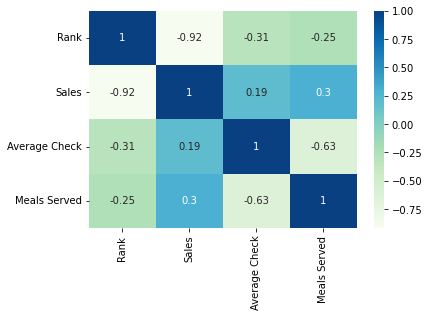

In [35]:
# correation matrix and heatmap
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


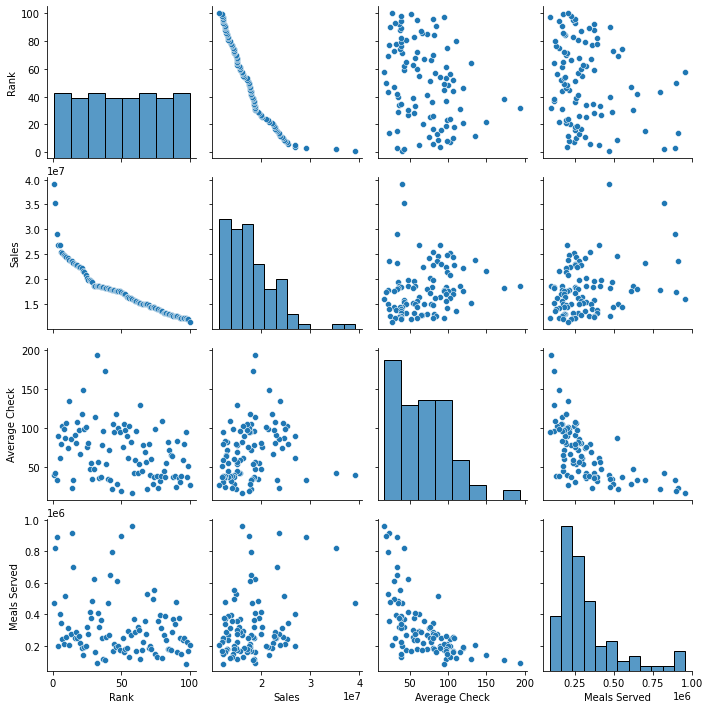

In [36]:
# pairplot
sns.pairplot(df,height = 2.5)

In [37]:
# grouped bar chart
for i in range(0, len(cat_list)):
    primary_cat = cat_list[i]
for j in range(0, len(cat_list)):
        secondary_cat = cat_list[j]
if secondary_cat != primary_cat:
            plt.figure (figsize = (15,15))
            chart = sns.countplot(
                data = df,
                x= primary_cat, 
                hue= secondary_cat,
                palette = 'GnBu',
                order=df[primary_cat].value_counts().iloc[:10].index #show only TOP10
              )

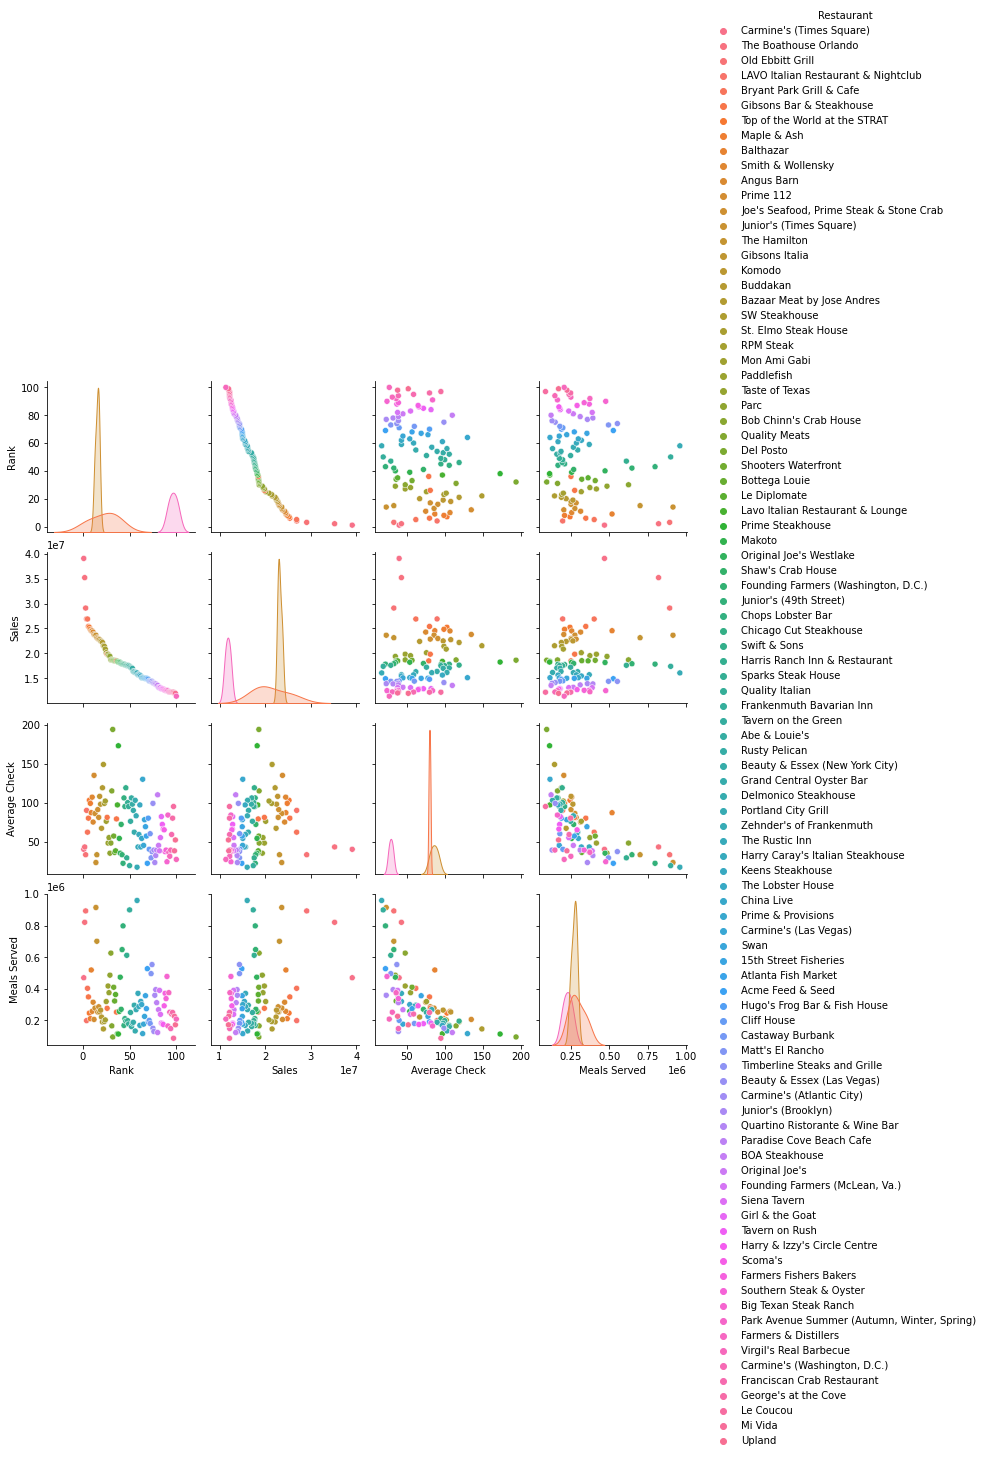

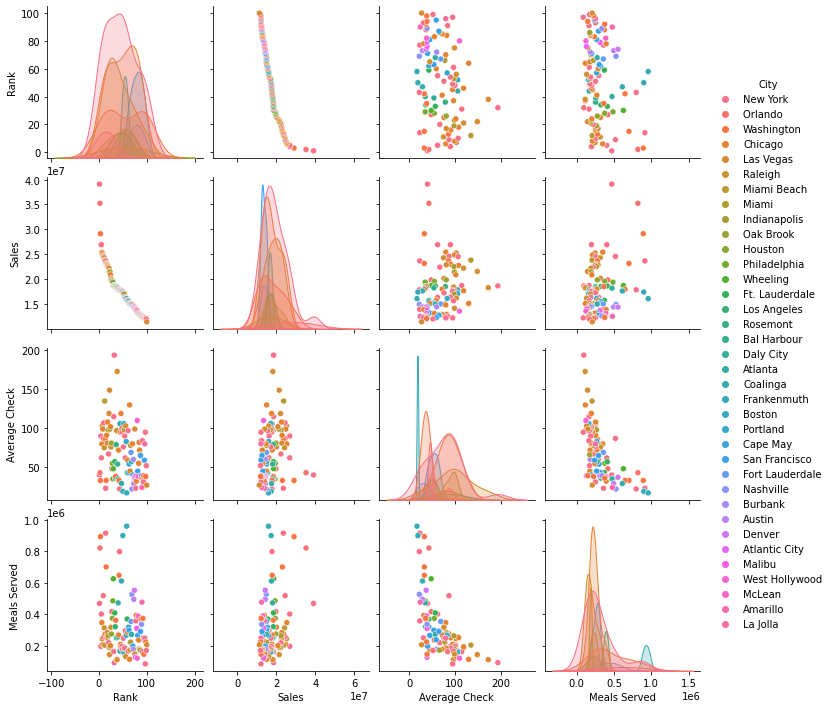

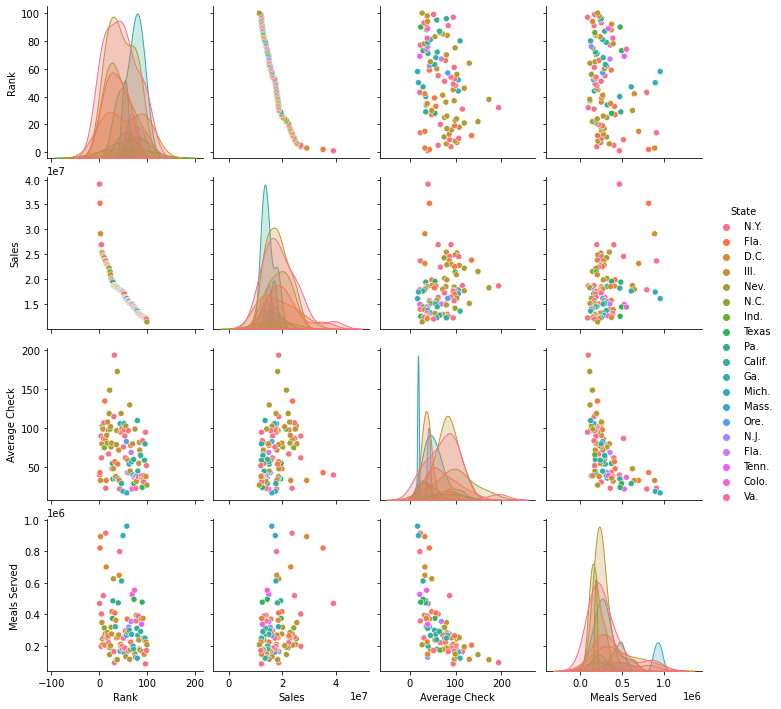

In [38]:
# pairplot with hue
for i in range(0, len(cat_list)):
    hue_cat = cat_list[i]
    sns.pairplot(df, hue = hue_cat)

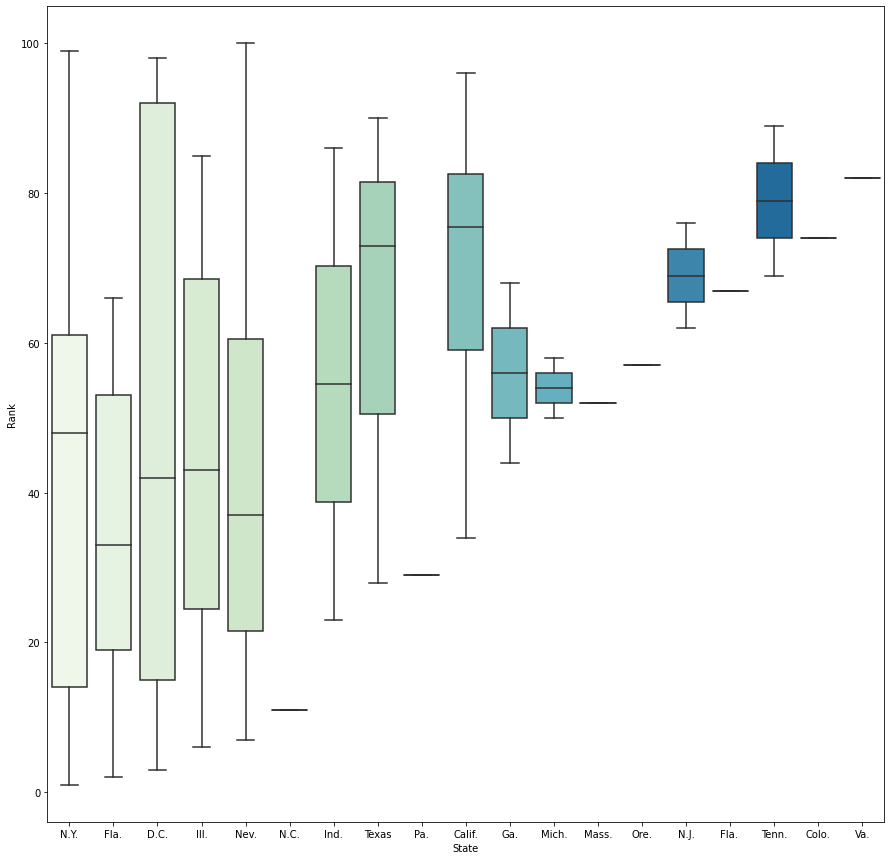

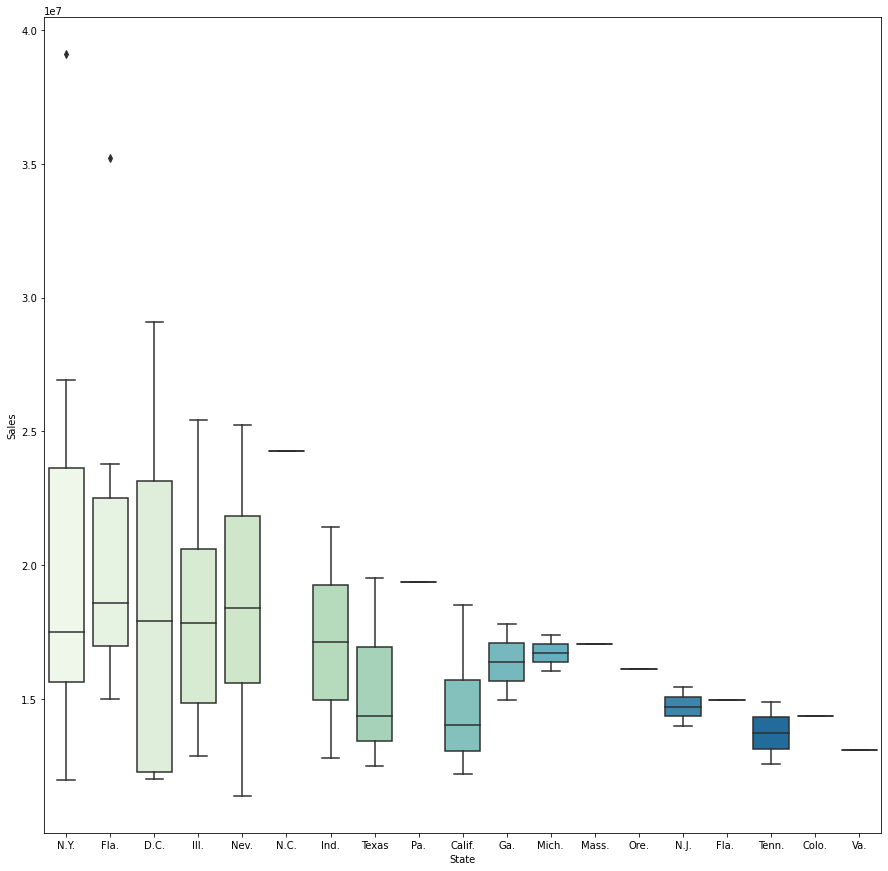

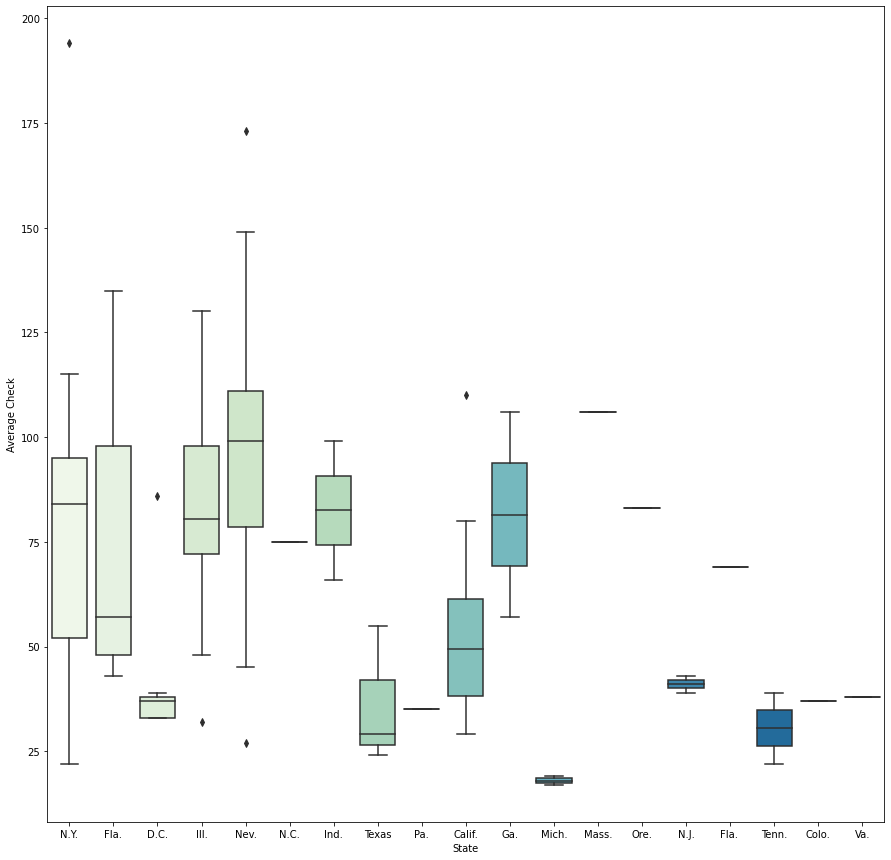

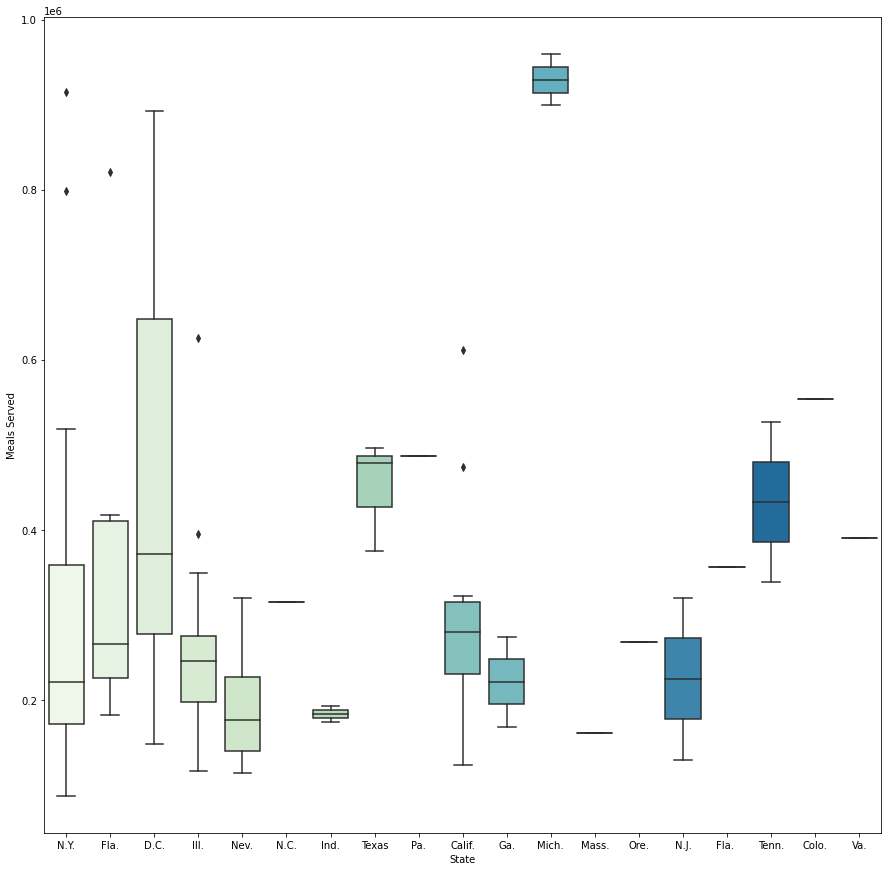

In [41]:
# box plot
for i in range(0, len(cat_list)):
    cat = cat_list[i]
for j in range(0, len(num_list)):
        num = num_list[j]
        plt.figure (figsize = (15,15))
        sns.boxplot( x = cat, y = num, data = df, palette = "GnBu")